<a href="https://colab.research.google.com/github/yunyeong-choi/2022fin/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C%20%EB%B0%B0%EC%9A%B0%EB%8A%94%20%EC%8B%A4%EC%A0%84%20%EA%B8%88%EC%9C%B5%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D(%ED%80%80%ED%8A%B8)/7%EA%B0%95_%EB%B3%BC%EB%A6%B0%EC%A0%80%EB%B0%B4%EB%93%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20221003

In [1]:
# COLAB 환경을 위한 나눔고딕 한글폰트 설치  --> 진행 후,  런타임 > 런타임 다시 시작을 해 주세요. 다시 시작 후에는 이 부분 실행 X
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,156 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# 라이브러리 import

In [1]:
# matplotlib 임포트,  주피터 출력설정,  한글 글꼴 지정
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumBarunGothic'  # (Colab 용) 한글 출력을 위한 글꼴 설정

In [2]:
import pandas as pd
import numpy as np

# 볼린저밴드 그리기

Reference : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-directly-with-matplotlib

-  freq="B"  : 월~금기준으로 날짜생성

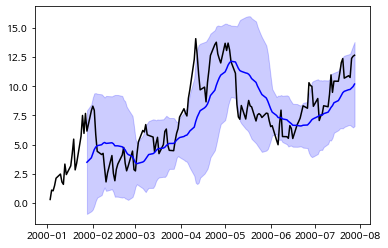

In [4]:
price = pd.Series(
    np.random.randn(150).cumsum(),
    index=pd.date_range("2000-1-1", periods=150, freq="B"),
)
ma = price.rolling(20).mean()
mstd = price.rolling(20).std()
plt.figure();
plt.plot(price.index, price, "k");
plt.plot(ma.index, ma, "b");
plt.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="b", alpha=0.2);

# 삼성전자 주가의 볼린저 밴드 구해보기

#### 예제 주식 데이터 csv 파일 다운로드

In [5]:
!wget "https://gist.githubusercontent.com/solaris33/e9938d2f36969a28b5cf15dfc17a77b3/raw/402e4494a6a0cce7d1d1d543cb5d9ac7831c6d1b/stock.adj_close.csv" -O "stock.adj_close.csv"

--2022-10-03 06:45:50--  https://gist.githubusercontent.com/solaris33/e9938d2f36969a28b5cf15dfc17a77b3/raw/402e4494a6a0cce7d1d1d543cb5d9ac7831c6d1b/stock.adj_close.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9051250 (8.6M) [text/plain]
Saving to: ‘stock.adj_close.csv’

stock.adj_close.csv 100%[===================>]   8.63M  42.2MB/s    in 0.2s    

2022-10-03 06:45:52 (42.2 MB/s) - ‘stock.adj_close.csv’ saved [9051250/9051250]



In [6]:
# 주가 데이터를 불러오고, series 하나를 고릅니다.
주가_데이터 = pd.read_csv('stock.adj_close.csv', index_col=0)
주가_데이터

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,11100.0,11350.0,11550.0,11500.0,11550.0,11300.0,11300.0,11050.0,10900.0,10750.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12700.0,12700.0,12650.0,12700.0,12800.0,13000.0,13200.0,13150.0,13150.0,13200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,38600.0,36400.0,36350.0,38700.0,40200.0,39250.0,38300.0,38350.0,39000.0,37600.0,...,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,8010.0,8010.0
A950170,13850.0,14250.0,14450.0,14300.0,14150.0,13650.0,14050.0,13600.0,13550.0,11900.0,...,4040.0,4050.0,4245.0,4275.0,4200.0,4195.0,4070.0,4045.0,4015.0,4055.0
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13200.0,13150.0,13100.0,13150.0,13100.0,13900.0,13250.0,13350.0,13550.0,13450.0


In [7]:
my_series = 주가_데이터.loc['A005930'][:]
my_series    # Series

2018-06-01    51300.0
2018-06-04    51100.0
2018-06-05    51300.0
2018-06-07    50600.0
2018-06-08    49650.0
               ...   
2020-09-14    60400.0
2020-09-15    61000.0
2020-09-16    61000.0
2020-09-17    59500.0
2020-09-18    59300.0
Name: A005930, Length: 568, dtype: float64

In [8]:
my_series.index    # Series의 인덱스 보기

Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08',
       '2018-06-11', '2018-06-12', '2018-06-14', '2018-06-15', '2018-06-18',
       ...
       '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
       '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18'],
      dtype='object', length=568)

In [9]:
my_series.name    # Series의 이름 보기

'A005930'

In [10]:
type(my_series)    # 타입 확인하기

pandas.core.series.Series

In [11]:
# 불러온 주가 데이터에서 불러오고, dataframe 하나를 추출합니다.
my_df = 주가_데이터.T

In [12]:
my_df

Symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,9360.0,...,3245.0,NaN,7690.0,4970.0,6530.0,38600.0,13850.0,NaN,NaN,NaN
2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,9440.0,...,3245.0,NaN,7700.0,4900.0,6870.0,36400.0,14250.0,NaN,NaN,NaN
2018-06-05,11700.0,16050.0,3025.0,13600.0,20150.0,123500.0,20350.0,41406.0,152500.0,9390.0,...,3240.0,NaN,7690.0,4940.0,6690.0,36350.0,14450.0,NaN,NaN,NaN
2018-06-07,11650.0,16500.0,3069.0,13800.0,20050.0,124500.0,21000.0,41498.0,154000.0,9490.0,...,3245.0,NaN,7680.0,5140.0,6950.0,38700.0,14300.0,NaN,NaN,NaN
2018-06-08,11500.0,16600.0,3045.0,13800.0,20400.0,123500.0,20750.0,41956.0,154000.0,9510.0,...,3180.0,NaN,7680.0,5280.0,6740.0,40200.0,14150.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,26300.0,14800.0,860.0,11300.0,13000.0,67500.0,37300.0,65700.0,158000.0,17000.0,...,1760.0,1395.0,6960.0,28900.0,4135.0,9540.0,4195.0,13900.0,30050.0,17450.0
2020-09-15,25400.0,14800.0,833.0,11300.0,13200.0,66200.0,38500.0,68700.0,162500.0,17250.0,...,1780.0,1395.0,7010.0,29800.0,4185.0,9540.0,4070.0,13250.0,31450.0,15800.0
2020-09-16,25050.0,14800.0,817.0,11050.0,13150.0,65400.0,37950.0,68400.0,177500.0,17200.0,...,1745.0,1385.0,6990.0,31900.0,4200.0,9540.0,4045.0,13350.0,31750.0,15100.0
2020-09-17,25300.0,14800.0,812.0,10900.0,13150.0,64500.0,37150.0,66400.0,179500.0,17200.0,...,1710.0,1355.0,7030.0,30800.0,4155.0,8010.0,4015.0,13550.0,31200.0,14700.0


In [13]:
# 삼성전자 종목코드 : A005930
# 삼성전자 종목 데이터 가져오기
삼성전자_df = my_df.loc[:, 'A005930'].to_frame()
삼성전자_df.rename(columns = {'A005930' : 'adj_close'}, inplace = True)
삼성전자_df

,adj_close
2018-06-01,51300.0
2018-06-04,51100.0
2018-06-05,51300.0
2018-06-07,50600.0
2018-06-08,49650.0
...,...
2020-09-14,60400.0
2020-09-15,61000.0
2020-09-16,61000.0
2020-09-17,59500.0


In [14]:
# 20일간 종가의 이동평균
삼성전자_df["ma20"] = 삼성전자_df['adj_close'].rolling(20).mean()

In [15]:
삼성전자_df["ma20"]

2018-06-01        NaN
2018-06-04        NaN
2018-06-05        NaN
2018-06-07        NaN
2018-06-08        NaN
               ...   
2020-09-14    56710.0
2020-09-15    56840.0
2020-09-16    57000.0
2020-09-17    57205.0
2020-09-18    57375.0
Name: ma20, Length: 568, dtype: float64

In [16]:
삼성전자_df

,adj_close,ma20
2018-06-01,51300.0,NaN
2018-06-04,51100.0,NaN
2018-06-05,51300.0,NaN
2018-06-07,50600.0,NaN
2018-06-08,49650.0,NaN
...,...,...
2020-09-14,60400.0,56710.0
2020-09-15,61000.0,56840.0
2020-09-16,61000.0,57000.0
2020-09-17,59500.0,57205.0


In [17]:
삼성전자_df["adj_close"].describe()

count      568.000000
mean     48539.084507
std       5455.958399
min      37450.000000
25%      44650.000000
50%      46925.000000
75%      52125.000000
max      62400.000000
Name: adj_close, dtype: float64

In [18]:
# 분산
삼성전자_df["adj_close"].var()

29767482.052810688

In [19]:
# 표준편차
삼성전자_df["adj_close"].std()

5455.958399109242

In [20]:
# 20일간 종가의 표준편차
# UpperB = 종가의 이동평균 + (표준편차 * 2)
# LowerB = 종가의 이동평균 - (표준편차 * 2)
삼성전자_df["stddev"] = 삼성전자_df["adj_close"].rolling(20).std()
삼성전자_df["UpperB"] = 삼성전자_df["ma20"] + (삼성전자_df["stddev"] * 2)
삼성전자_df["LowerB"] = 삼성전자_df["ma20"] - (삼성전자_df["stddev"] * 2)
삼성전자_df

,adj_close,ma20,stddev,UpperB,LowerB
2018-06-01,51300.0,NaN,NaN,NaN,NaN
2018-06-04,51100.0,NaN,NaN,NaN,NaN
2018-06-05,51300.0,NaN,NaN,NaN,NaN
2018-06-07,50600.0,NaN,NaN,NaN,NaN
2018-06-08,49650.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-09-14,60400.0,56710.0,1808.721561,60327.443121,53092.556879
2020-09-15,61000.0,56840.0,2017.919721,60875.839442,52804.160558
2020-09-16,61000.0,57000.0,2215.258094,61430.516187,52569.483813
2020-09-17,59500.0,57205.0,2248.853509,61702.707018,52707.292982


Text(0.5, 1.0, '삼성전사 볼린저밴드 구현')

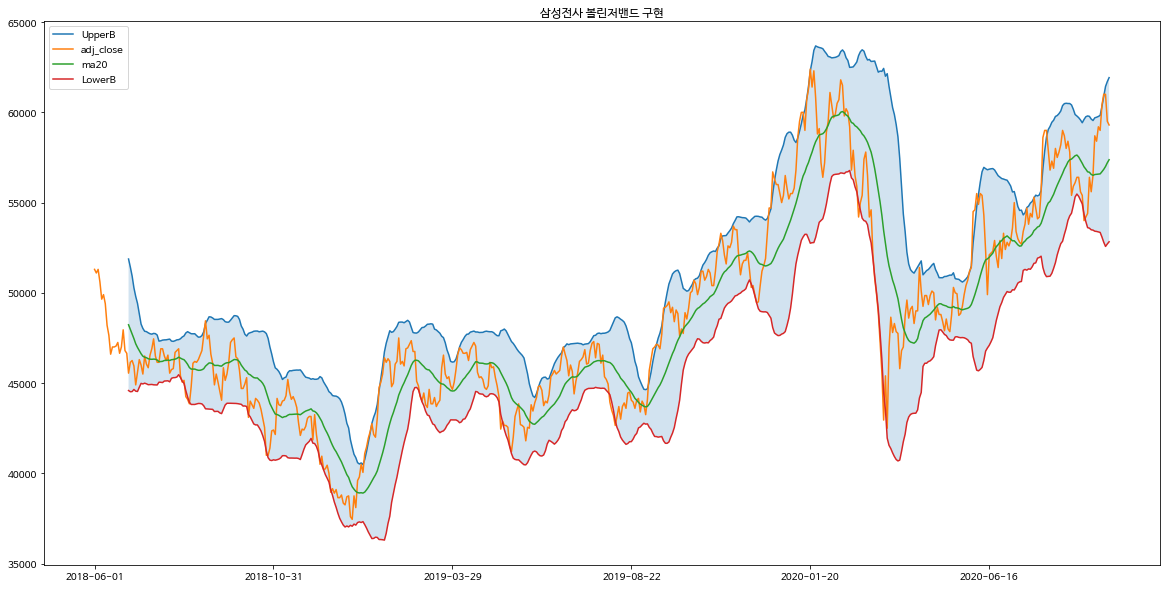

In [22]:
# "UpperB", "adj_close", "LowerB" 를 시각화 합니다.
삼성전자_df[["UpperB", "adj_close", "ma20", "LowerB"]].plot(figsize=(20,10))
plt.fill_between(삼성전자_df.index, 삼성전자_df.LowerB, 삼성전자_df.UpperB, alpha=0.2)
plt.title("삼성전사 볼린저밴드 구현")

#%b 구해보기

In [23]:
# %b = 종가 - 하위밴드 / 상위밴드 - 하위밴드
삼성전자_df["PercentB"] = (삼성전자_df["adj_close"] - 삼성전자_df["LowerB"]) / (삼성전자_df["UpperB"] - 삼성전자_df["LowerB"])

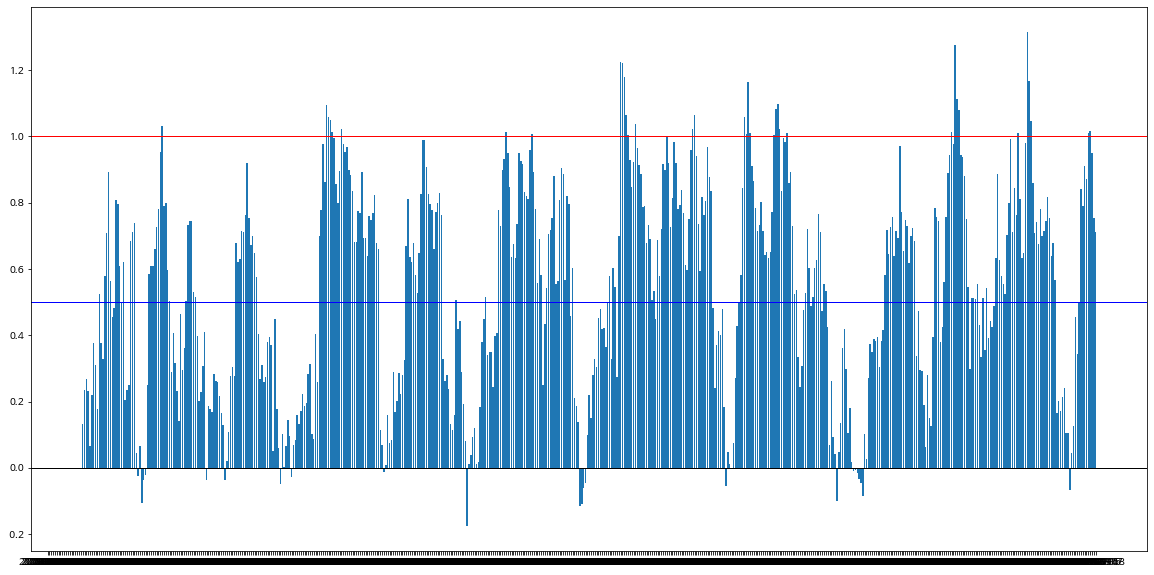

In [25]:
# %b 시각화
plt.figure(figsize=(20, 10))
plt.bar(삼성전자_df.index, 삼성전자_df["PercentB"])
plt.axhline(1, c="r", lw=1) #1보다 크면 상단밴드를 뚫고 나감->매도 추천
plt.axhline(0.5, c="b", lw=1)
plt.axhline(0, c="k", lw=1) #0보다 작으면 하단밴드를 뚫고 나감

# 다양한 종목들의 볼린저 밴드 그려보기


In [26]:
# plot Bollinger Bands
def plot_bollinger_bands(df, n=20, k=2):
    # 20일간 종가의 이동평균
    df["MA20"] = df["adj_close"].rolling(n).mean()
    # 20일간 종가의 표준편차
    df["stddev"] = df["adj_close"].rolling(n).std()
    # 종가의 이동평균 + (표준편차 * 2)
    df["UpperB"] = df["MA20"] + (df["stddev"] * k)
    # 종가의 이동평균 - (표준편차 * 2)
    df["LowerB"] = df["MA20"] - (df["stddev"] * k)
    # skip NaN data
    df = df[n-1:].copy()
    
    plt.figure(figsize=(15, 5))
    plt.plot(df.index, df.UpperB, "r--", label="UpperB")
    plt.plot(df.index, df.adj_close, "k")
    plt.plot(df.index, df.LowerB, "b--", label="LowerB")
    plt.plot(df.index, df.MA20)
    plt.fill_between(df.index, df.LowerB, df.UpperB, alpha=0.2)

In [27]:
my_df

Symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,9360.0,...,3245.0,NaN,7690.0,4970.0,6530.0,38600.0,13850.0,NaN,NaN,NaN
2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,9440.0,...,3245.0,NaN,7700.0,4900.0,6870.0,36400.0,14250.0,NaN,NaN,NaN
2018-06-05,11700.0,16050.0,3025.0,13600.0,20150.0,123500.0,20350.0,41406.0,152500.0,9390.0,...,3240.0,NaN,7690.0,4940.0,6690.0,36350.0,14450.0,NaN,NaN,NaN
2018-06-07,11650.0,16500.0,3069.0,13800.0,20050.0,124500.0,21000.0,41498.0,154000.0,9490.0,...,3245.0,NaN,7680.0,5140.0,6950.0,38700.0,14300.0,NaN,NaN,NaN
2018-06-08,11500.0,16600.0,3045.0,13800.0,20400.0,123500.0,20750.0,41956.0,154000.0,9510.0,...,3180.0,NaN,7680.0,5280.0,6740.0,40200.0,14150.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,26300.0,14800.0,860.0,11300.0,13000.0,67500.0,37300.0,65700.0,158000.0,17000.0,...,1760.0,1395.0,6960.0,28900.0,4135.0,9540.0,4195.0,13900.0,30050.0,17450.0
2020-09-15,25400.0,14800.0,833.0,11300.0,13200.0,66200.0,38500.0,68700.0,162500.0,17250.0,...,1780.0,1395.0,7010.0,29800.0,4185.0,9540.0,4070.0,13250.0,31450.0,15800.0
2020-09-16,25050.0,14800.0,817.0,11050.0,13150.0,65400.0,37950.0,68400.0,177500.0,17200.0,...,1745.0,1385.0,6990.0,31900.0,4200.0,9540.0,4045.0,13350.0,31750.0,15100.0
2020-09-17,25300.0,14800.0,812.0,10900.0,13150.0,64500.0,37150.0,66400.0,179500.0,17200.0,...,1710.0,1355.0,7030.0,30800.0,4155.0,8010.0,4015.0,13550.0,31200.0,14700.0


- 종목 코드랑 종가 가져오는 함수

In [28]:
def extract_df(df, code):
  extracted_df = df.loc[:, code].to_frame()
  extracted_df.rename(columns = {code : 'adj_close'}, inplace = True)

  return extracted_df

In [29]:
temp_df = extract_df(my_df, 'A000020')
temp_df

,adj_close
2018-06-01,11550.0
2018-06-04,11750.0
2018-06-05,11700.0
2018-06-07,11650.0
2018-06-08,11500.0
...,...
2020-09-14,26300.0
2020-09-15,25400.0
2020-09-16,25050.0
2020-09-17,25300.0


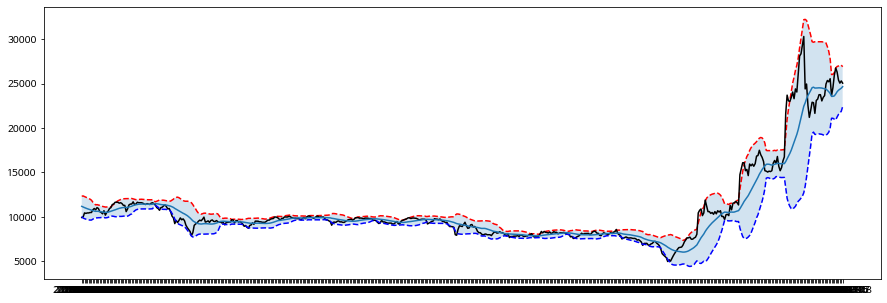

In [30]:
# A000020 : 동화약품
plot_bollinger_bands(extract_df(my_df, 'A000020'))

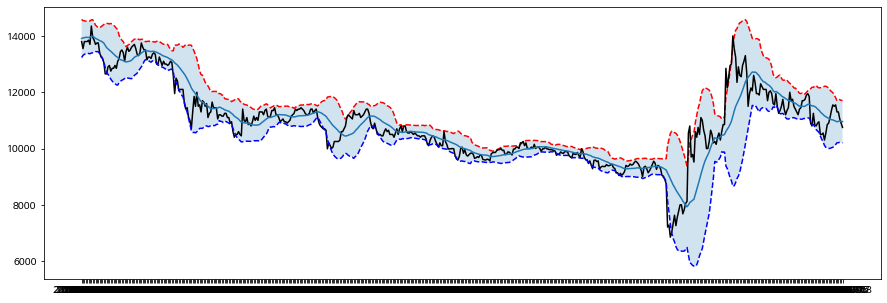

In [31]:
# A000050 : 경방
plot_bollinger_bands(extract_df(my_df, 'A000050'))

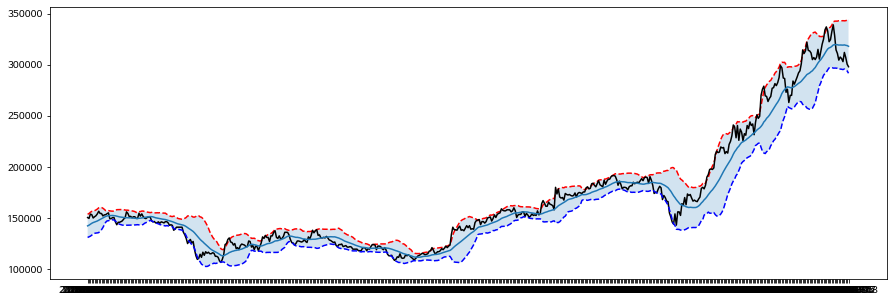

In [32]:
# A035420 : 네이버
plot_bollinger_bands(extract_df(my_df, 'A035420'))

In [33]:
my_df.index

Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08',
       '2018-06-11', '2018-06-12', '2018-06-14', '2018-06-15', '2018-06-18',
       ...
       '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
       '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18'],
      dtype='object', length=568)

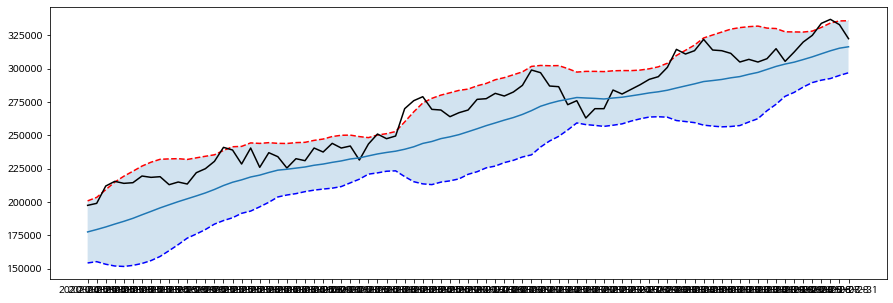

In [34]:
# A035420 : 네이버
# 2020-04-01부터 2020-08-31까지 날짜의 볼린저 밴드 그리기
plot_bollinger_bands(extract_df(my_df.loc['2020-04-01':'2020-08-31',:], 'A035420'))

# 볼린저 밴드 상향 돌파 전략 구현해보기

# 데이터 준비

In [35]:
!wget "https://drive.google.com/uc?export=download&id=1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1" -O "stock_data.zip"

--2022-10-03 06:56:26--  https://drive.google.com/uc?export=download&id=1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1
Resolving drive.google.com (drive.google.com)... 64.233.189.139, 64.233.189.102, 64.233.189.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/occimd4urhru585m89574clgstn64943/1664780175000/03135380322884973343/*/1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1?e=download&uuid=94a5868b-40af-48c8-9401-0fbf731d1f88 [following]
--2022-10-03 06:56:27--  https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/occimd4urhru585m89574clgstn64943/1664780175000/03135380322884973343/*/1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1?e=download&uuid=94a5868b-40af-48c8-9401-0fbf731d1f88
Resolving doc-00-4g-docs.googleusercontent.com (doc-00-4g-docs.googleusercontent.com)... 142.251.8.132, 2404:6

In [37]:
!unzip stock_data.zip

Archive:  stock_data.zip
replace stock.adj_close.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
d = {}

for data_name in ['adj_close']:
    print(f"read csv {data_name} ...")
    d[data_name] = pd.read_csv(f"stock.{data_name}.csv", index_col=0, encoding='cp949', parse_dates=True)
    print(f"done!  {d[data_name].shape}")

read csv adj_close ...
done!  (2278, 582)


In [ ]:
d

{'adj_close':          2018-06-01  2018-06-04  2018-06-05  ...  2020-10-12  2020-10-13  2020-10-14
 Symbol                                       ...                                    
 A000020     11550.0     11750.0     11700.0  ...     24000.0     24300.0     23850.0
 A000030     15500.0     15950.0     16050.0  ...     14800.0     14800.0     14800.0
 A000040      2992.0      3021.0      3025.0  ...       863.0       850.0       874.0
 A000050     13200.0     13550.0     13600.0  ...     11000.0     10850.0     10800.0
 A000060     20050.0     20050.0     20150.0  ...     13950.0     13700.0     13550.0
 ...             ...         ...         ...  ...         ...         ...         ...
 A950160     38600.0     36400.0     36350.0  ...      8010.0      8010.0      8010.0
 A950170     13850.0     14250.0     14450.0  ...      4445.0      4440.0      4335.0
 A950180         NaN         NaN         NaN  ...     12900.0     12650.0     13350.0
 A950190         NaN         NaN         

In [ ]:
itemname = pd.read_csv("stockinfo.itemname.csv", index_col=0, encoding='cp949')
sector = pd.read_csv("stockinfo.sector.csv", index_col=0, encoding='cp949')

In [ ]:
stock_info = pd.concat([itemname, sector], axis=1)

In [ ]:
stock_info

,itemname,Sector
Symbol,,
A000020,동화약품,제약_및_바이오
A000030,우리은행,NaN
A000040,KR모터스,자동차_및_부품
A000050,경방,내구_소비재_및_의류
A000060,메리츠화재,보험
...,...,...
A950160,코오롱티슈진,NaN
A950170,JTC,NaN
A950180,SNK,NaN


# 볼린저 밴드 구현하기

In [ ]:
n = 20
k = 2
d["MA20"] = d["adj_close"].rolling(n, axis=1).mean()
# 20일간 종가의 표준편차
d["stddev"] = d["adj_close"].rolling(n, axis=1).std()
# 종가의 이동평균 + (표준편차 * 2)
d["UpperB"] = d["MA20"] + (d["stddev"] * k)
# 종가의 이동평균 - (표준편차 * 2)
d["LowerB"] = d["MA20"] - (d["stddev"] * k)

In [ ]:
d["adj_close"]

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,2018-06-19,2018-06-20,2018-06-21,2018-06-22,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-07-02,2018-07-03,2018-07-04,2018-07-05,2018-07-06,2018-07-09,2018-07-10,2018-07-11,2018-07-12,2018-07-13,2018-07-16,2018-07-17,2018-07-18,2018-07-19,2018-07-20,2018-07-23,2018-07-24,2018-07-25,2018-07-26,2018-07-27,2018-07-30,...,2020-08-13,2020-08-14,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,10850.0,11200.0,11000.0,11150.0,10900.0,11000.0,10750.0,10300.0,10200.0,9940.0,10000.0,10450.0,10400.0,10450.0,10450.0,10500.0,10500.0,10800.0,10950.0,10800.0,11050.0,10950.0,10600.0,10500.0,10350.0,10700.0,10200.0,10500.0,10650.0,10950.0,...,22550.0,21200.0,22000.0,22900.0,22850.0,21650.0,23100.0,23250.0,23750.0,23750.0,23050.0,23450.0,23650.0,24950.0,25350.0,25200.0,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0,25050.0,24050.0,23150.0,21100.0,22100.0,22000.0,21850.0,24100.0,23750.0,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,16350.0,16350.0,16350.0,16350.0,16350.0,16500.0,16100.0,15850.0,16300.0,16350.0,16450.0,16400.0,16250.0,16750.0,17000.0,16600.0,16700.0,16500.0,16950.0,16650.0,16500.0,16400.0,16400.0,16500.0,16600.0,16500.0,16750.0,16700.0,16850.0,16800.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,3017.0,2992.0,2907.0,2834.0,2724.0,2607.0,2550.0,2448.0,2448.0,2339.0,2347.0,2298.0,2310.0,2318.0,2586.0,2590.0,2578.0,2570.0,2558.0,2566.0,2558.0,2513.0,2473.0,2436.0,2420.0,2399.0,2379.0,2391.0,2395.0,2379.0,...,707.0,706.0,688.0,690.0,671.0,671.0,679.0,705.0,703.0,673.0,686.0,705.0,735.0,923.0,894.0,950.0,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0,775.0,729.0,711.0,777.0,771.0,743.0,767.0,829.0,810.0,860.0,863.0,863.0,850.0,874.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,14250.0,14200.0,14100.0,13550.0,13800.0,13900.0,14250.0,14200.0,13850.0,13800.0,13550.0,13800.0,13800.0,13800.0,13850.0,13700.0,14350.0,13950.0,13850.0,13700.0,13750.0,13750.0,13400.0,13250.0,13200.0,13050.0,12650.0,12650.0,12900.0,12950.0,...,11950.0,11850.0,10900.0,10800.0,11250.0,10850.0,10800.0,10900.0,10950.0,10500.0,10500.0,10550.0,10300.0,10550.0,10850.0,10900.0,11100.0,11350.0,11550.0,11500.0,11550.0,11300.0,11300.0,11050.0,10900.0,10750.0,10750.0,10400.0,10350.0,11600.0,10750.0,10500.0,10550.0,10850.0,10900.0,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,21100.0,20700.0,19700.0,20000.0,19550.0,19400.0,19200.0,19300.0,19200.0,19150.0,19300.0,19450.0,19250.0,19550.0,19500.0,19350.0,19150.0,19200.0,18950.0,18700.0,18600.0,18650.0,18700.0,18250.0,18350.0,18550.0,18700.0,18300.0,18650.0,18650.0,...,13550.0,13400.0,12850.0,12850.0,12350.0,12700.0,12550.0,12900.0,12700.0,12650.0,12800.0,12750.0,12650.0,12650.0,12750.0,12600.0,12700.0,12700.0,12650.0,12700.0,12800.0,13000.0,13200.0,13150.0,13150.0,13200.0,

In [ ]:
d["MA20"]

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,2018-06-19,2018-06-20,2018-06-21,2018-06-22,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,2018-07-02,2018-07-03,2018-07-04,2018-07-05,2018-07-06,2018-07-09,2018-07-10,2018-07-11,2018-07-12,2018-07-13,2018-07-16,2018-07-17,2018-07-18,2018-07-19,2018-07-20,2018-07-23,2018-07-24,2018-07-25,2018-07-26,2018-07-27,2018-07-30,...,2020-08-13,2020-08-14,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11192.00,11114.5,11049.50,10984.5,10924.50,10872.0,10822.0,10764.5,10704.50,10662.0,10629.50,10639.5,10627.00,10607.00,10574.50,10547.00,10532.00,10504.5,10514.50,10537.0,10587.5,...,23662.50,23945.00,24230.00,24537.50,24597.50,24495.00,24497.5,24510.00,24525.00,24510.00,24497.50,24450.00,24430.00,24377.5,24240.00,24082.50,23892.50,23560.00,23567.50,23617.5,23827.50,24082.50,24252.50,24360.00,24482.50,24652.50,24750.00,24790.00,24760.00,24627.50,24580.00,24507.5,24417.5,24375.00,24295.0,24210.00,24140.00,24157.5,24145.00,24040.00
A000030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16295.00,16342.5,16365.00,16375.0,16387.50,16407.5,16405.0,16397.5,16397.50,16440.0,16455.00,16462.5,16465.00,16467.50,16475.00,16487.50,16487.50,16520.0,16562.50,16590.0,16612.5,...,14800.00,14800.00,14800.00,14800.00,14800.00,14800.00,14800.0,14800.00,14800.00,14800.00,14800.00,14800.00,14800.00,14800.0,14800.00,14800.00,14800.00,14800.00,14800.00,14800.0,14800.00,14800.00,14800.00,14800.00,14800.00,14800.00,14800.00,14800.00,14800.00,14800.00,14800.00,14800.0,14800.0,14800.00,14800.0,14800.00,14800.00,14800.0,14800.00,14800.00
A000040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2853.05,2820.8,2784.65,2748.9,2711.35,2688.4,2668.7,2648.8,2625.65,2601.9,2579.35,2556.4,2532.45,2510.75,2490.85,2475.65,2465.25,2456.7,2453.85,2451.2,2453.2,...,732.70,728.20,723.45,719.80,715.85,711.90,709.3,707.65,706.60,704.05,702.55,702.20,704.65,715.7,723.95,733.45,745.25,755.95,757.90,765.7,772.35,780.05,787.30,793.65,800.70,806.95,811.75,812.95,813.35,818.55,822.80,824.7,826.3,821.60,817.4,812.90,807.05,803.6,809.05,809.00
A000050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13910.00,13927.5,13940.00,13950.0,13950.00,13952.5,13947.5,13982.5,13987.50,13955.0,13912.50,13887.5,13865.00,13830.00,13815.00,13785.00,13742.50,13662.5,13585.00,13537.5,13495.0,...,11567.50,11585.00,11542.50,11512.50,11515.00,11490.00,11457.5,11402.50,11365.00,11302.50,11252.50,11210.00,11160.00,11127.5,11100.00,11072.50,11042.50,11025.00,11015.00,10995.0,10975.00,10947.50,10967.50,10980.00,10962.50,10957.50,10955.00,10930.00,10900.00,10955.00,10967.50,10965.0,10977.5,10992.50,10995.0,10995.00,10990.00,10972.5,10937.50,10902.50
A000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20042.50,20005.0,19975.00,19930.0,19905.00,19860.0,19820.0,19742.5,19655.00,19595.0,19485.00,19360.0,19257.50,19207.50,19120.00,19060.00,19017.50,18992.5,18942.50,18915.0,18890.0,...,12762.50,12782.50,12787.50,12787.50,12745.00,12737.50,12725.0,12735.00,12737.50,12735.00,12745.00,12762.50,12787.50,12792.5,12802.50,12802.50,12817.50,12825.00,12810.00,12772.5,12735.00,12715.00,12732.50,12747.50,12787.50,12812.50,12837.50,12827.50,12840.00,12845.00,12842.50,12842.5,12852.5,12877.50,12905.0,12942.50,13002.50,13065.0,13117.50,13160.00
...,...,...,...,...,...,...,

In [ ]:
d

{'LowerB':          2018-06-01  2018-06-04  ...    2020-10-13    2020-10-14
 Symbol                           ...                            
 A000020         NaN         NaN  ...  21067.253046  21080.519249
 A000030         NaN         NaN  ...  14800.000000  14800.000000
 A000040         NaN         NaN  ...    711.718283    711.810007
 A000050         NaN         NaN  ...  10209.940995  10223.123351
 A000060         NaN         NaN  ...  12360.584514  12406.342253
 ...             ...         ...  ...           ...           ...
 A950160         NaN         NaN  ...   7033.059326   7060.202497
 A950170         NaN         NaN  ...   3709.930851   3705.836525
 A950180         NaN         NaN  ...  12259.557708  12256.122713
 A950190         NaN         NaN  ...  26278.257704  26238.883124
 A950200         NaN         NaN  ...  12784.270420  12831.020793
 
 [2278 rows x 582 columns],
 'MA20':          2018-06-01  2018-06-04  2018-06-05  ...  2020-10-12  2020-10-13  2020-10-14
 Symbol 

In [ ]:
# 시뮬레이션을 위한 날짜 변수와 날짜 인덱스 변수 만들기
date_list = d['adj_close'].columns
date_i = np.arange(len(date_list))

In [ ]:
# 날짜 변수 확인하기 (앞부분)
date_list[:5], date_i[:5]

(Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08'], dtype='object'),
 array([0, 1, 2, 3, 4]))

In [ ]:
date_list

Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08',
       '2018-06-11', '2018-06-12', '2018-06-14', '2018-06-15', '2018-06-18',
       ...
       '2020-09-25', '2020-09-28', '2020-09-29', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-12', '2020-10-13', '2020-10-14'],
      dtype='object', length=582)

In [ ]:
# 시뮬레이션 할 종목 선택하기
code = 'A060250'   # 'A060250' NHN한국사이버결제,   'A068270' 셀트리온
code_name = stock_info.loc[code, 'itemname']
code, code_name

('A060250', 'NHN한국사이버결제')

In [ ]:
print("볼린저밴드 상향 돌파 Signal")

for i in date_i:
    
    # (첫 날)과  (마지막날-20일전) 이후는 계산을 할 수 없으므로 제외합니다
    if i < 1 or i > 548:
        continue
    
    now_date = date_list[i]
    
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    당일_볼린저밴드_상단 = d['UpperB'].loc[code, now_date]
    
    # 볼린저 밴드 상향 돌파 전략 조건 : 당일 주가 > 당일 볼린저 밴드 상단
    if 당일_주가 > 당일_볼린저밴드_상단:
        print(f"  - {now_date}  Signal 발생! 당일 주가 {당일_주가} 볼린저밴드 상단밴드 {당일_볼린저밴드_상단}")

볼린저밴드 상향 돌파 Signal
  - 2018-07-10  Signal 발생! 당일 주가 13615.0 볼린저밴드 상단밴드 13376.616082464478
  - 2018-07-11  Signal 발생! 당일 주가 13472.0 볼린저밴드 상단밴드 13436.140522685408
  - 2018-07-12  Signal 발생! 당일 주가 13615.0 볼린저밴드 상단밴드 13598.588250613553
  - 2018-11-27  Signal 발생! 당일 주가 12278.0 볼린저밴드 상단밴드 12265.840758069928
  - 2019-02-11  Signal 발생! 당일 주가 14050.0 볼린저밴드 상단밴드 13757.737905308846
  - 2019-02-12  Signal 발생! 당일 주가 13900.0 볼린저밴드 상단밴드 13885.40147089174
  - 2019-04-12  Signal 발생! 당일 주가 14100.0 볼린저밴드 상단밴드 13539.647499302837
  - 2019-04-15  Signal 발생! 당일 주가 14150.0 볼린저밴드 상단밴드 13841.023066317452
  - 2019-04-16  Signal 발생! 당일 주가 15250.0 볼린저밴드 상단밴드 14439.16644609137
  - 2019-04-17  Signal 발생! 당일 주가 15000.0 볼린저밴드 상단밴드 14818.77076959659
  - 2019-04-18  Signal 발생! 당일 주가 15300.0 볼린저밴드 상단밴드 15207.555936188031
  - 2019-06-11  Signal 발생! 당일 주가 14350.0 볼린저밴드 상단밴드 14085.154121764872
  - 2019-06-12  Signal 발생! 당일 주가 14800.0 볼린저밴드 상단밴드 14418.870510229974
  - 2019-06-13  Signal 발생! 당일 주가 15750.0 볼린저밴드 상단밴드 14982.059

In [ ]:
print("볼린저밴드 상향 돌파 Signal")

보유일 = 20

for i in date_i:
    # (첫 날)과  (마지막날-20일전) 이후는 계산을 할 수 없으므로 제외합니다
    if i < 1 or i > 548:
        continue
    
    now_date = date_list[i]
    
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    당일_볼린저밴드_상단 = d['UpperB'].loc[code, now_date]
    
    # 볼린저 밴드 상향 돌파 전략 조건 : 당일 주가 > 당일 볼린저 밴드 상단
    if 당일_주가 > 당일_볼린저밴드_상단:
        
        #--------------------------------------------------------------------------------------------start
        sell_date = date_list[i + 보유일]
        매도시_주가 = d['adj_close'].loc[code, sell_date]
        수익률 = (매도시_주가 / 당일_주가)*100 - 100
        
        print(f"  - {now_date}  Signal 발생!  매수주가 {당일_주가:.0f}  ->  매도주가 {매도시_주가:.0f}  , 수익률 {수익률:.3f} %")
        #--------------------------------------------------------------------------------------------end

볼린저밴드 상향 돌파 Signal
  - 2018-07-10  Signal 발생!  매수주가 13615  ->  매도주가 14380  , 수익률 5.619 %
  - 2018-07-11  Signal 발생!  매수주가 13472  ->  매도주가 14284  , 수익률 6.027 %
  - 2018-07-12  Signal 발생!  매수주가 13615  ->  매도주가 14523  , 수익률 6.669 %
  - 2018-11-27  Signal 발생!  매수주가 12278  ->  매도주가 11800  , 수익률 -3.893 %
  - 2019-02-11  Signal 발생!  매수주가 14050  ->  매도주가 12850  , 수익률 -8.541 %
  - 2019-02-12  Signal 발생!  매수주가 13900  ->  매도주가 12800  , 수익률 -7.914 %
  - 2019-04-12  Signal 발생!  매수주가 14100  ->  매도주가 13150  , 수익률 -6.738 %
  - 2019-04-15  Signal 발생!  매수주가 14150  ->  매도주가 13450  , 수익률 -4.947 %
  - 2019-04-16  Signal 발생!  매수주가 15250  ->  매도주가 12800  , 수익률 -16.066 %
  - 2019-04-17  Signal 발생!  매수주가 15000  ->  매도주가 12850  , 수익률 -14.333 %
  - 2019-04-18  Signal 발생!  매수주가 15300  ->  매도주가 12700  , 수익률 -16.993 %
  - 2019-06-11  Signal 발생!  매수주가 14350  ->  매도주가 19200  , 수익률 33.798 %
  - 2019-06-12  Signal 발생!  매수주가 14800  ->  매도주가 19400  , 수익률 31.081 %
  - 2019-06-13  Signal 발생!  매수주가 15750  ->  매도주가 19550  , 

In [ ]:
print("볼린저밴드 상향 돌파 Signal")

보유일 = 20

#--------------------------------------------------------------------------------------------start
signal_i_list = []
signal_date_list = []
signal_price_list = []
signal_return_list = []
#--------------------------------------------------------------------------------------------end


for i in date_i:
    if i < 1 or i > len(date_list) - 보유일:
        continue
        
    now_date = date_list[i]
    
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    당일_볼린저밴드_상단 = d['UpperB'].loc[code, now_date]
    
    # 볼린저 밴드 상향 돌파 전략 조건 : 당일 주가 > 당일 볼린저 밴드 상단
    if 당일_주가 > 당일_볼린저밴드_상단:        
        sell_date = date_list[i+보유일]
        매도시_주가 = d['adj_close'].loc[code, sell_date]
        수익률 = (매도시_주가 / 당일_주가)*100 - 100
        
        print(f"  - {now_date}  Signal 발생!  매수주가 {당일_주가:.0f}  ->  매도주가 {매도시_주가:.0f}  , 수익률 {수익률:.3f} %")
        
        #--------------------------------------------------------------------------------------------start
        signal_i_list.append(i)
        signal_date_list.append(now_date)
        signal_price_list.append(당일_주가)
        signal_return_list.append(수익률)
        #--------------------------------------------------------------------------------------------end

볼린저밴드 상향 돌파 Signal
  - 2018-07-10  Signal 발생!  매수주가 13615  ->  매도주가 14380  , 수익률 5.619 %
  - 2018-07-11  Signal 발생!  매수주가 13472  ->  매도주가 14284  , 수익률 6.027 %
  - 2018-07-12  Signal 발생!  매수주가 13615  ->  매도주가 14523  , 수익률 6.669 %
  - 2018-11-27  Signal 발생!  매수주가 12278  ->  매도주가 11800  , 수익률 -3.893 %
  - 2019-02-11  Signal 발생!  매수주가 14050  ->  매도주가 12850  , 수익률 -8.541 %
  - 2019-02-12  Signal 발생!  매수주가 13900  ->  매도주가 12800  , 수익률 -7.914 %
  - 2019-04-12  Signal 발생!  매수주가 14100  ->  매도주가 13150  , 수익률 -6.738 %
  - 2019-04-15  Signal 발생!  매수주가 14150  ->  매도주가 13450  , 수익률 -4.947 %
  - 2019-04-16  Signal 발생!  매수주가 15250  ->  매도주가 12800  , 수익률 -16.066 %
  - 2019-04-17  Signal 발생!  매수주가 15000  ->  매도주가 12850  , 수익률 -14.333 %
  - 2019-04-18  Signal 발생!  매수주가 15300  ->  매도주가 12700  , 수익률 -16.993 %
  - 2019-06-11  Signal 발생!  매수주가 14350  ->  매도주가 19200  , 수익률 33.798 %
  - 2019-06-12  Signal 발생!  매수주가 14800  ->  매도주가 19400  , 수익률 31.081 %
  - 2019-06-13  Signal 발생!  매수주가 15750  ->  매도주가 19550  , 

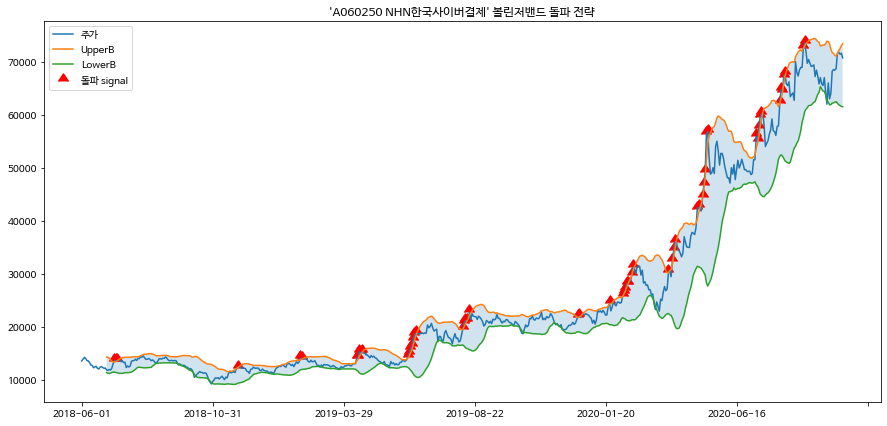

In [ ]:
d['adj_close'].loc[code, :].plot(figsize=(15,7), label='주가');
d['UpperB'].loc[code, :].plot(label='UpperB');
d['LowerB'].loc[code, :].plot(label='LowerB');
plt.fill_between(d['adj_close'].columns, d['UpperB'].loc[code, :], d['LowerB'].loc[code, :], alpha=0.2)
plt.scatter(x=signal_i_list, y=signal_price_list, marker=10, color='red', s=100 , label='돌파 signal');

plt.title(f"'{code} {code_name}' 볼린저밴드 돌파 전략")
plt.legend();

In [ ]:
수익률_합 = sum(signal_return_list)
평균_수익률 = 수익률_합 / len(signal_return_list)

단순_기간_수익률 = (d['adj_close'].loc[code][-1] / d['adj_close'].loc[code][0]) * 100 - 100

print(f"전체 매매 수익률 합  {수익률_합:.2f}%,  매매 당 평균 수익률  {평균_수익률:.2f}%,  "
      f"단순 기간 수익률 {단순_기간_수익률:.2f}%")

전체 매매 수익률 합  203.10%,  매매 당 평균 수익률  3.63%,  단순 기간 수익률 421.08%


##### <연습문제 3-6>
**볼린저밴드 돌파 시뮬레이션** 분석을 종목 '셀트리온'에 대해 수행하고, 결과를 출력해보세요

In [ ]:
# 시뮬레이션 할 종목 선택하기
code = 'A068270'   # 'A060250' NHN한국사이버결제,   'A068270' 셀트리온
code_name = stock_info.loc[code, 'itemname']
code, code_name

('A068270', '셀트리온')

In [ ]:
print("볼린저밴드 상향 돌파 Signal")

보유일 = 20

#--------------------------------------------------------------------------------------------start
signal_i_list = []
signal_date_list = []
signal_price_list = []
signal_return_list = []
#--------------------------------------------------------------------------------------------end


for i in date_i:
    if i < 1 or i > len(date_list) - 보유일:
        continue
        
    now_date = date_list[i]
    
    당일_주가 = d['adj_close'].loc[code, now_date]
    
    당일_볼린저밴드_상단 = d['UpperB'].loc[code, now_date]
    
    # 볼린저 밴드 상향 돌파 전략 조건 : 당일 주가 > 당일 볼린저 밴드 상단
    if 당일_주가 > 당일_볼린저밴드_상단:        
        sell_date = date_list[i+보유일]
        매도시_주가 = d['adj_close'].loc[code, sell_date]
        수익률 = (매도시_주가 / 당일_주가)*100 - 100
        
        print(f"  - {now_date}  Signal 발생!  매수주가 {당일_주가:.0f}  ->  매도주가 {매도시_주가:.0f}  , 수익률 {수익률:.3f} %")
        
        #--------------------------------------------------------------------------------------------start
        signal_i_list.append(i)
        signal_date_list.append(now_date)
        signal_price_list.append(당일_주가)
        signal_return_list.append(수익률)
        #--------------------------------------------------------------------------------------------end

볼린저밴드 상향 돌파 Signal
  - 2018-09-13  Signal 발생!  매수주가 275417  ->  매도주가 244450  , 수익률 -11.244 %
  - 2018-09-17  Signal 발생!  매수주가 283862  ->  매도주가 251957  , 수익률 -11.240 %
  - 2018-09-18  Signal 발생!  매수주가 281986  ->  매도주가 231313  , 수익률 -17.970 %
  - 2018-09-19  Signal 발생!  매수주가 287147  ->  매도주가 211607  , 수익률 -26.307 %
  - 2019-09-04  Signal 발생!  매수주가 159987  ->  매도주가 170493  , 수익률 6.567 %
  - 2019-10-07  Signal 발생!  매수주가 170493  ->  매도주가 188641  , 수익률 10.644 %
  - 2019-10-08  Signal 발생!  매수주가 172404  ->  매도주가 187686  , 수익률 8.864 %
  - 2019-10-23  Signal 발생!  매수주가 187686  ->  매도주가 176224  , 수익률 -6.107 %
  - 2019-12-26  Signal 발생!  매수주가 181000  ->  매도주가 171000  , 수익률 -5.525 %
  - 2019-12-27  Signal 발생!  매수주가 184000  ->  매도주가 167000  , 수익률 -9.239 %
  - 2020-02-17  Signal 발생!  매수주가 186000  ->  매도주가 165500  , 수익률 -11.022 %
  - 2020-03-31  Signal 발생!  매수주가 229000  ->  매도주가 210500  , 수익률 -8.079 %
  - 2020-06-01  Signal 발생!  매수주가 227500  ->  매도주가 311000  , 수익률 36.703 %
  - 2020-06-03  Signal 발생!  매

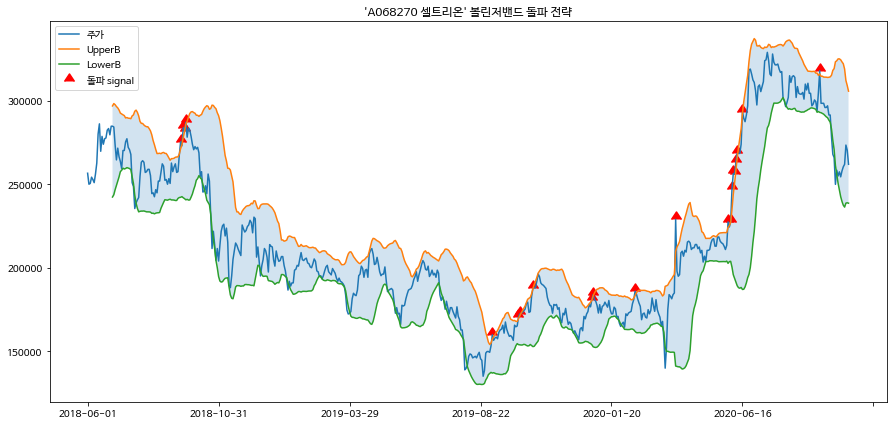

In [ ]:
d['adj_close'].loc[code, :].plot(figsize=(15,7), label='주가');
d['UpperB'].loc[code, :].plot(label='UpperB');
d['LowerB'].loc[code, :].plot(label='LowerB');
plt.fill_between(d['adj_close'].columns, d['UpperB'].loc[code, :], d['LowerB'].loc[code, :], alpha=0.2)
plt.scatter(x=signal_i_list, y=signal_price_list, marker=10, color='red', s=100 , label='돌파 signal');

plt.title(f"'{code} {code_name}' 볼린저밴드 돌파 전략")
plt.legend();

In [ ]:
수익률_합 = sum(signal_return_list)
평균_수익률 = 수익률_합 / len(signal_return_list)

단순_기간_수익률 = (d['adj_close'].loc[code][-1] / d['adj_close'].loc[code][0]) * 100 - 100

print(f"전체 매매 수익률 합  {수익률_합:.2f}%,  매매 당 평균 수익률  {평균_수익률:.2f}%,  "
      f"단순 기간 수익률 {단순_기간_수익률:.2f}%")

전체 매매 수익률 합  81.20%,  매매 당 평균 수익률  3.87%,  단순 기간 수익률 2.08%
